In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout

C:\Users\sahH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sahH\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
RawData = pd.read_csv("creditcard.csv")

In [3]:
RawData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


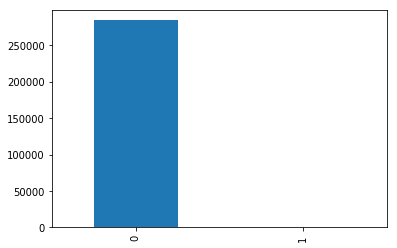

In [15]:
RawData.Class.value_counts().plot('bar')
plt.show()

In [4]:
print(RawData.shape)
y = RawData.iloc[:,30]
x = RawData.iloc[:,:30]
# print(x)
x.shape


(284807, 31)


(284807, 30)

### Base model

In [5]:
LR = LogisticRegression()
Cv = KFold(n_splits=3,shuffle=True)
#result = cross_validation.cross_val_score(LR,x,y,cv = 10,scoring='f1')


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 10)
LR = LR.fit(x_train,y_train)
pred_y = LR.predict(x_test)

In [122]:
np.unique(pred_y)
# pred_y.value_counts()

array([0, 1], dtype=int64)

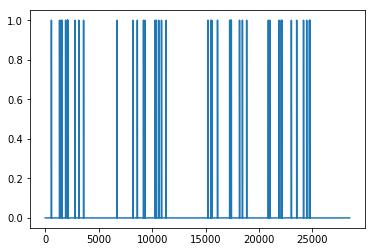

In [123]:
# pred_y.plot(bar)
type(pred_y)
plt.plot(pred_y)

In [124]:
confusion_matrix(pred_y,y_test)

array([[28422,    13],
       [   11,    35]], dtype=int64)

In [8]:
positve_class = RawData[RawData.Class==1]
negative_class = RawData[RawData.Class==0]
len(negative_class)

284315

In [7]:
upscaled_positive = resample(positve_class,replace = True, n_samples = 200000,random_state = 10)
NewRaw = pd.concat([upscaled_positive,negative_class])
x = NewRaw.iloc[:,0:30]
y = NewRaw.iloc[:,30]
#y

NameError: name 'positve_class' is not defined

In [10]:
NewRaw.shape

(484315, 31)

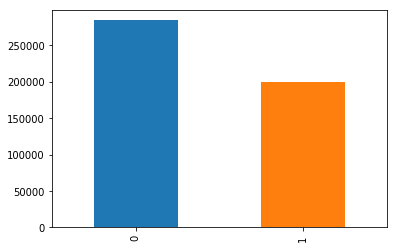

In [10]:
NewRaw['Class'].value_counts().plot('bar')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 10)
LR = LR.fit(x_train,y_train)
print(LR.score(x_test,y_test))
pred_y = LR.predict(x_test)

In [9]:
confusion_matrix(pred_y,y_test)

array([[28284,  2829],
       [  314, 17005]], dtype=int64)

In [159]:
result = cross_validation.cross_val_score(LR,x,y,scoring = 'accuracy', cv = 10)

In [162]:
result.mean()

0.9274130845437595

In [163]:
print(classification_report(y_test,pred_y))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     28598
          1       0.98      0.86      0.92     19834

avg / total       0.94      0.94      0.93     48432



In [ ]:
# sc = SVC(kernel='rbf')
# sc.fit(x_train,y_train)
# sc.score(x_test,y_test)
# result = cross_validation.cross_val_score(sc,x,y,scoring = 'recall',cv = 10)

In [ ]:
# SVM takes a ling time to run
# Decision trees will be a better option

In [9]:
RF = RandomForestClassifier(max_features=15)
ResultRF = cross_validation.cross_val_score(RF,x,y,cv = 10)

In [18]:
print(ResultRF)
print(ResultRF.mean())

[0.80106128 0.99993806 0.99997935 1.         0.99991741 0.99960769
 0.99989676 1.         0.99997935 0.53246887]
0.9332848776690514


In [8]:
RF.score(x_test,y_test)
pred_y = RF.predict(x_test)
print(classification_report(y_test,pred_y))

NameError: name 'RF' is not defined

## Predicting with Keras

In [16]:
def BNN(optimizer):
    model = Sequential()
    model.add(Dense(30, input_dim=30,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(10, activation='relu'))
    #model.add(Dense(7, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
# Fitting the model
    return model

# clf_nn = model.fit(x_train,y_train,epochs=100,batch_size=50,validation_data=(x_test,y_test))

In [17]:
# using keras wrapper
NN = KerasClassifier(build_fn=BNN)

In [12]:
# Create hyperparameter space
epochs = [10]
batches = [32]
optimizers = ['adadelta']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

In [13]:
hyperparameters

{'optimizer': ['adadelta'], 'epochs': [10], 'batch_size': [32]}

In [18]:
# Create grid search
grid = GridSearchCV(estimator=NN, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(x_train,y_train,validation_data=(x_test,y_test))

Train on 170884 samples, validate on 28481 samples
Epoch 1/10
170884/170884 [==============================] - 9s 54us/step - loss: 0.5740 - acc: 0.9623 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 2/10
170884/170884 [==============================] - 11s 63us/step - loss: 0.1848 - acc: 0.9885 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 3/10
170884/170884 [==============================] - 9s 55us/step - loss: 0.0934 - acc: 0.9942 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 4/10
170884/170884 [==============================] - 9s 51us/step - loss: 0.0588 - acc: 0.9963 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 5/10
170884/170884 [==============================] - 9s 53us/step - loss: 0.0566 - acc: 0.9965 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 6/10
170884/170884 [==============================] - 9s 52us/step - loss: 0.0461 - acc: 0.9971 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 7/10
170884/170884 [==============================] - 8s 49us/step - loss: 0.0398 - acc: 0.9975 - val_loss: 

In [20]:
grid_result.best_params_

{'batch_size': 32, 'epochs': 10, 'optimizer': 'adadelta'}

In [22]:
model = Sequential()
model.add(Dense(30, input_dim=30,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))
model.compile(loss='binary_crossentropy', optimizer='adadelta',metrics=['accuracy'])

In [23]:
clfNN = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Train on 256326 samples, validate on 28481 samples
Epoch 1/10
256326/256326 [==============================] - 5s 18us/step - loss: 0.6442 - acc: 0.9537 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 2/10
256326/256326 [==============================] - 4s 16us/step - loss: 0.1939 - acc: 0.9880 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 3/10
256326/256326 [==============================] - 4s 15us/step - loss: 0.1059 - acc: 0.9934 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 4/10
256326/256326 [==============================] - 4s 15us/step - loss: 0.0668 - acc: 0.9958 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 5/10
256326/256326 [==============================] - 4s 16us/step - loss: 0.0541 - acc: 0.9966 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 6/10
256326/256326 [==============================] - 5s 19us/step - loss: 0.0463 - acc: 0.9971 - val_loss: 0.0272 - val_acc: 0.9983
Epoch 7/10
256326/256326 [==============================] - 5s 19us/step - loss: 0.0458 - acc: 0.9971 - val_loss: 0

Text(0,0.5,'Accuracy')

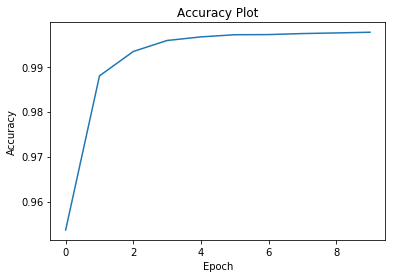

In [25]:
plt.plot(clfNN.history['acc'])
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')